In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### This notebook was created to run a t-SNE algorithm on a pairwise SNP distance matrix to get the embeddings

In [3]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from pylab import MaxNLocator
import seaborn as sns; sns.set()
from matplotlib.colors import LogNorm
from matplotlib import gridspec
from sklearn.manifold import TSNE

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

## Run t-SNE on pairwise distance matrix to get the embeddings

Load the pairwise SNP distance matrix

In [4]:
pairwise_SNP_dist = np.load('/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/Genotype_Filtered_2/pairwise_distance_matrix/pairwise_SNP_distance_matrix.npy')

In [5]:
pairwise_SNP_dist

array([[   0, 1708, 1048, ..., 1056,  990, 1092],
       [1708,    0, 1619, ..., 1631, 1650, 1665],
       [1048, 1619,    0, ...,  642, 1014,  687],
       ...,
       [1056, 1631,  642, ...,    0, 1025,  329],
       [ 990, 1650, 1014, ..., 1025,    0, 1051],
       [1092, 1665,  687, ...,  329, 1051,    0]])

In [6]:
np.shape(pairwise_SNP_dist)

(20352, 20352)

In [45]:
perplex = 175
tsne_steps = 1000
lr = 1500

tsne = TSNE(perplexity=perplex, 
            n_components=2, 
            metric="precomputed",
            n_iter=tsne_steps, 
            learning_rate=lr)

t_SNE_coords = tsne.fit_transform(pairwise_SNP_dist)

In [46]:
t_SNE_coords

array([[-61.032284 , -29.651209 ],
       [-11.613359 , -10.58242  ],
       [ 34.160156 ,  39.21244  ],
       ...,
       [ 14.362637 ,  20.883938 ],
       [  3.5229323, -51.537285 ],
       [-12.190159 ,  29.606594 ]], dtype=float32)

In [47]:
np.shape(t_SNE_coords)

(20352, 2)

Store the t-SNE embeddings to homoplasy visualizations

In [51]:
np.savetxt('/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/tb_output/tSNE_embeddings_from_pairwise_SNP_dist_perplexity175_lr1500.txt' , t_SNE_coords)

## Load t-SNE embeddings if already run (above)

In [148]:
## t_SNE_coords = np.loadtxt('/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/tb_output/tSNE_embeddings_from_pairwise_SNP_dist.txt')

In [48]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 14})

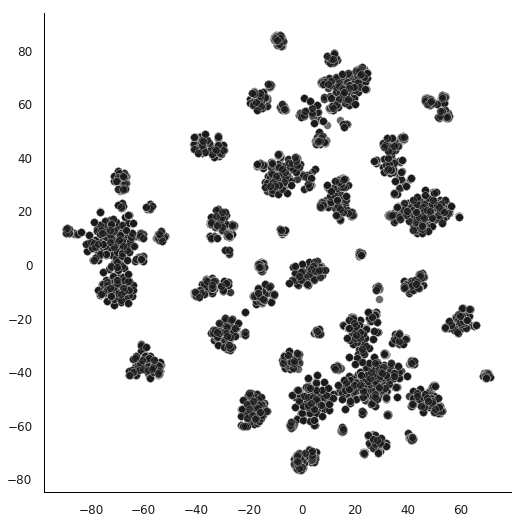

In [49]:
fig , ax = plt.subplots()

circ_size = 60
alpha = 0.65

plt.scatter( t_SNE_coords[: , 0] , t_SNE_coords[: , 1]  , color = 'k' , edgecolor = 'white' , linewidth = 0.35 , alpha = alpha , s = circ_size)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='y', which='major', labelsize=12, pad = 6, labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12, pad = 6, labelcolor = 'k')

fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/basic_tSNE.pdf'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()

Get ordering of isolates & lineage calls from isolate annotation file

In [12]:
isolate_annotation_DF = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/Genotype_Filtered_2/genotypes_isolate_annotation.pkl')

In [13]:
isolate_annotation_DF.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,isolate_ID
0,3,1,1,NaN,NaN,SAMN03647419
1,1,1,3,NaN,NaN,SAMN07659096
2,4,1,1,NaN,NaN,SAMEA1119683
3,2,2,1,NaN,NaN,SAMN05576173
4,2,2,1,NaN,NaN,SAMN08612836


In [14]:
np.shape(isolate_annotation_DF)

(20352, 6)

Get a one string key for the lineage call for each isolate

In [15]:
full_lineage_calls = []

for isolate_i in isolate_annotation_DF.index:

    full_lineage_call = ''

    sep_lineage_calls = list( isolate_annotation_DF.loc[isolate_i , ['lineage_1','lineage_2','lineage_3','lineage_4','lineage_5']].values )

    for sep_lineage_call in sep_lineage_calls:

        if type(sep_lineage_call) == str:

            full_lineage_call += sep_lineage_call + '.'

    full_lineage_call = full_lineage_call[:-1]
    
    full_lineage_calls.append(full_lineage_call)

In [16]:
len(full_lineage_calls)

20352

In [17]:
isolate_annotation_DF['full_lineage_call'] = full_lineage_calls

In [18]:
isolate_annotation_DF.head()

,lineage_1,lineage_2,lineage_3,lineage_4,lineage_5,isolate_ID,full_lineage_call
0,3,1,1,NaN,NaN,SAMN03647419,3.1.1
1,1,1,3,NaN,NaN,SAMN07659096,1.1.3
2,4,1,1,NaN,NaN,SAMEA1119683,4.1.1
3,2,2,1,NaN,NaN,SAMN05576173,2.2.1
4,2,2,1,NaN,NaN,SAMN08612836,2.2.1


## Color Samples Global Lineage Classification

Plot coordinates for each isolate

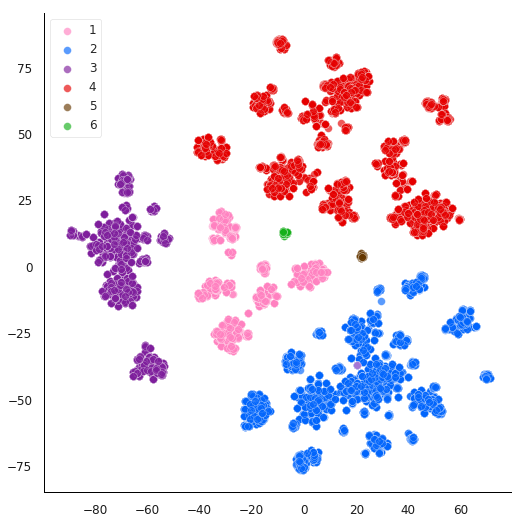

In [50]:
fig , ax = plt.subplots()

circ_size = 60
alpha = 0.65

#Modern 
#lineage 2 (N = 7,000)
L2 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '2'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '2']  , color = 'xkcd:bright blue' , edgecolor = 'white' , linewidth = 0.35 , alpha = alpha , s = circ_size)

#lineage 4 (N = 7,000)
L4 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '4'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '4']  , color = 'xkcd:red' , edgecolor = 'white' , linewidth = 0.35 , alpha = alpha , s = circ_size)

#Ancestral
#lineage 3 (N = 3,352)
L3 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '3'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '3']  , color = 'xkcd:purple' , edgecolor = 'white' , linewidth = 0.35 , alpha = alpha , s = circ_size)

#lineage 1 (N = 2,802)
L1 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '1'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '1']  , color = 'xkcd:pink' , edgecolor = 'white' , linewidth = 0.35 , alpha = alpha , s = circ_size)

#lineage 5 (N = 101)
L5 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '5'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '5']  , color = 'xkcd:brown' , edgecolor = 'white' , linewidth = 0.35 , alpha = alpha , s = circ_size)

#lineage 6 (N = 97)
L6 = plt.scatter( t_SNE_coords[: , 0][isolate_annotation_DF.lineage_1 == '6'] , t_SNE_coords[: , 1][isolate_annotation_DF.lineage_1 == '6']  , color = 'xkcd:green' , edgecolor = 'white' , linewidth = 0.35 , alpha = alpha , s = circ_size)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.tick_params(axis='y', which='major', labelsize=12, pad = 6, labelcolor = 'k')
ax.tick_params(axis='x', which='major', labelsize=12, pad = 6, labelcolor = 'k')

#add legend
plt.legend((L1, L2, L3, L4, L5, L6), ('1', '2', '3', '4', '5', '6'), scatterpoints=1, loc='upper left',ncol=1,fontsize=12)

fig = plt.gcf()
fig.set_size_inches(7.5, 7.5)
fig.tight_layout()

#file_name = '/n/data1/hms/dbmi/farhat/Roger/inhost_TB_dynamics_project/genotypes_matrix_and_tSNE/figures/t_SNE_plots/1_global_lineages.pdf'
#plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

plt.show()